Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import folium


Load data

In [5]:
df = pd.read_csv("Latest_Data_Science_Salaries.csv")


Exploratory Data Analysis

In [6]:
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [3]:
df.describe()

,Salary,Salary in USD,Year
count,3.300000e+03,3300.000000,3300.000000
mean,2.046623e+05,142095.983939,2022.495455
std,7.279383e+05,69028.235512,0.716355
min,1.400000e+04,15000.000000,2020.000000
25%,9.416900e+04,90000.000000,2022.000000
50%,1.400000e+05,136000.000000,2023.000000
75%,1.900000e+05,185000.000000,2023.000000
max,3.040000e+07,450000.000000,2023.000000


In [7]:
corr_matrix = df.corr()
corr_matrix

,Salary,Salary in USD,Year
Salary,1.000000,-0.025680,-0.099217
Salary in USD,-0.025680,1.000000,0.232142
Year,-0.099217,0.232142,1.000000


Visualization

Histograms and box plots

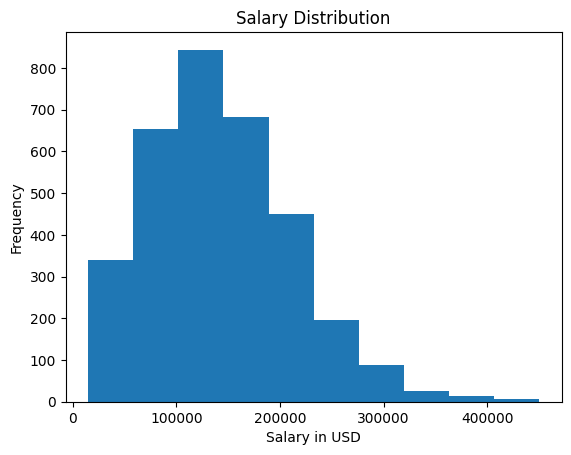

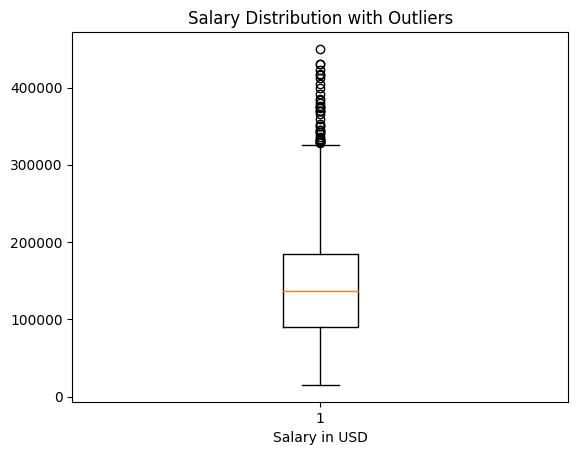

In [8]:
plt.hist(df["Salary in USD"])
plt.title("Salary Distribution")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()
plt.boxplot(df["Salary in USD"])
plt.title("Salary Distribution with Outliers")
plt.xlabel("Salary in USD")
plt.show()

Scatter plots

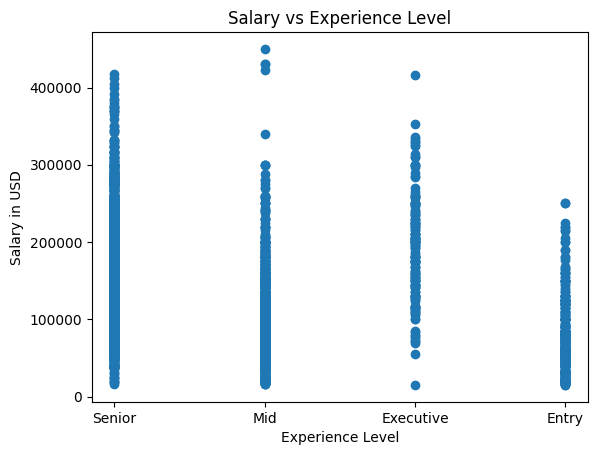

In [9]:
plt.scatter(df["Experience Level"], df["Salary in USD"])
plt.title("Salary vs Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.show()

Bar charts

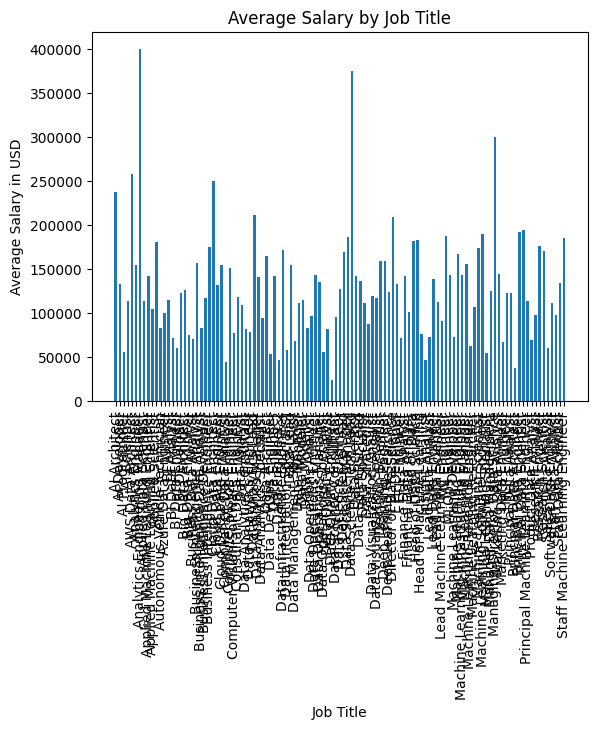

In [14]:
avg_salary_by_title = df.groupby("Job Title")["Salary in USD"].mean()
plt.bar(avg_salary_by_title.index, avg_salary_by_title.values, width=0.6)
plt.title("Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary in USD")
plt.xticks(rotation=90)
plt.show()


Maps

In [ ]:
salary_map = folium.Map(location=[df["Company Location"].mean(), df["Company Location"].mean()], zoom_start=2)
for lat, lon, salary in zip(df["Latitude"], df["Longitude"], df["Salary in USD"]):
    folium.CircleMarker([lat, lon], radius=5, color='blue', fill=True, fill_color='blue', fill_opacity=0.7).add_to(salary_map)
salary_map

Encode categorical varaibles

In [ ]:
one_hot_encoder = OneHotEncoder()
label_encoder = LabelEncoder()
job_title_encoded = label_encoder.fit_transform(df["Job Title"])
job_title_encoded = job_title_encoded.reshape(len(job_title_encoded), 1)
job_title_one_hot = one_hot_encoder.fit_transform(job_title_encoded).toarray()
company_size_encoded = label_encoder.fit_transform(df["Company Size"])
company_size_encoded = company_size_encoded.reshape(len(company_size_encoded), 1)
company_size_one_hot = one_hot_encoder.fit_transform(company_size_encoded).toarray()

Standardize data

In [ ]:
X = df.drop(columns=["Salary in USD"])
X_encoded = np.concatenate((job_title_one_hot, company_size_one_hot, X.values), axis=1)
y = df["Salary in USD"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

Build model

Split data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Create and train models

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

Evaluate models

In [ ]:
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
xgb_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

Print model performance metrics

In [ ]:
print("Linear Regression - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(lr_r2, lr_mae, lr_rmse))
print("Random Forest - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(rf_r2, rf_mae, rf_rmse))
print("XGBoost - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(xgb_r2, xgb_mae, xgb_rmse))

Tune model hyperparameters with cross-validation

Define parameter grid for random forest and XGBoost models

In [ ]:
rf_param_grid = {"n_estimators": [100, 200, 500],
"max_depth": [None, 5, 10],
"min_samples_split": [2, 5, 10]}
xgb_param_grid = {"n_estimators": [100, 200, 500],
"max_depth": [3, 5, 10],
"learning_rate": [0.01, 0.1, 0.3]}

Perform cross-validation

In [ ]:
rf_cv = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_cv.fit(X_train, y_train)
xgb_cv = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_cv.fit(X_train, y_train)

Print best hyperparameters

In [ ]:
print("Random Forest - Best parameters: ", rf_cv.best_params_)
print("XGBoost - Best parameters: ", xgb_cv.best_params_)

Pick the best model based on performance on test set

In [ ]:
best_model = xgb_cv.best_estimator_
best_model.fit(X_train, y_train)
best_model_pred = best_model.predict(X_test)
best_model_r2 = r2_score(y_test, best_model_pred)
best_model_mae = mean_absolute_error(y_test, best_model_pred)
best_model_rmse = np.sqrt(mean_squared_error(y_test, best_model_pred))
print("Best Model - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(best_model_r2, best_model_mae, best_model_rmse))